- https://github.com/hrishi-ds/Medium/blob/main/Visualize-Confusion-Matrix-Using-Sankey-Diagram/visualise-confusion-matrix-using-sankey.ipynb

In [1]:
import pandas as pd
import numpy as np
from plotly import graph_objects as go

In [2]:
confusion_matrix = np.array([[20712185, 30609, 108255, 151329],
 [173381, 3166773, 2344, 3356],
 [128620, 1413, 1788737, 35524],
 [300683, 656, 50827, 3122204]])
""" There are 51 test images where both the prediction and the label are only background.
These can be removed for better visualization
"""
remove_pixel_count = 288 * 288 * 51
non_background_confusion_matrix = np.array([[20712864 - remove_pixel_count, 30443, 105351, 153720],
 [182411, 3157742, 2334, 3367],
 [134734, 1402, 1778522, 39636],
 [316550, 656, 50119, 3107045]])

labels = {0:'Tausta', 1:'Pellot', 2:'Ojasuot', 3:'Ojattomat suot'}
colour_dict={0:"rgba(0, 0, 0, 1.0)", 1:"rgba(255, 215, 0, 0.75)", 2:"rgba(0, 139, 139, 0.75)", 3:"rgba(175, 238, 238, 0.75)"}

In [3]:
# create a dataframe 
df = pd.DataFrame(data=confusion_matrix, 
                  index=[f"Tosi-{labels[i]}" for i in range(confusion_matrix.shape[0])],
                  columns=[f"Ennuste-{labels[i]}" for i in range(confusion_matrix.shape[0])])
df

Ennuste-Tausta  Ennuste-Pellot  Ennuste-Ojasuot  \
Tosi-Tausta                20712864           30443           105351   
Tosi-Pellot                  182411         3157742             2334   
Tosi-Ojasuot                 134734            1402          1778522   
Tosi-Ojattomat suot          316550             656            50119   

                     Ennuste-Ojattomat suot  
Tosi-Tausta                          153720  
Tosi-Pellot                            3367  
Tosi-Ojasuot                          39636  
Tosi-Ojattomat suot                 3107045

In [4]:
# restructre the dataframe
df = df.stack().reset_index()
df

level_0                 level_1         0
0           Tosi-Tausta          Ennuste-Tausta  20712864
1           Tosi-Tausta          Ennuste-Pellot     30443
2           Tosi-Tausta         Ennuste-Ojasuot    105351
3           Tosi-Tausta  Ennuste-Ojattomat suot    153720
4           Tosi-Pellot          Ennuste-Tausta    182411
5           Tosi-Pellot          Ennuste-Pellot   3157742
6           Tosi-Pellot         Ennuste-Ojasuot      2334
7           Tosi-Pellot  Ennuste-Ojattomat suot      3367
8          Tosi-Ojasuot          Ennuste-Tausta    134734
9          Tosi-Ojasuot          Ennuste-Pellot      1402
10         Tosi-Ojasuot         Ennuste-Ojasuot   1778522
11         Tosi-Ojasuot  Ennuste-Ojattomat suot     39636
12  Tosi-Ojattomat suot          Ennuste-Tausta    316550
13  Tosi-Ojattomat suot          Ennuste-Pellot       656
14  Tosi-Ojattomat suot         Ennuste-Ojasuot     50119
15  Tosi-Ojattomat suot  Ennuste-Ojattomat suot   3107045

In [5]:
# rename the default column names
df.rename(columns={'level_0':'source', 'level_1':'target', 0:'value'}, inplace=True)
df

source                  target     value
0           Tosi-Tausta          Ennuste-Tausta  20712864
1           Tosi-Tausta          Ennuste-Pellot     30443
2           Tosi-Tausta         Ennuste-Ojasuot    105351
3           Tosi-Tausta  Ennuste-Ojattomat suot    153720
4           Tosi-Pellot          Ennuste-Tausta    182411
5           Tosi-Pellot          Ennuste-Pellot   3157742
6           Tosi-Pellot         Ennuste-Ojasuot      2334
7           Tosi-Pellot  Ennuste-Ojattomat suot      3367
8          Tosi-Ojasuot          Ennuste-Tausta    134734
9          Tosi-Ojasuot          Ennuste-Pellot      1402
10         Tosi-Ojasuot         Ennuste-Ojasuot   1778522
11         Tosi-Ojasuot  Ennuste-Ojattomat suot     39636
12  Tosi-Ojattomat suot          Ennuste-Tausta    316550
13  Tosi-Ojattomat suot          Ennuste-Pellot       656
14  Tosi-Ojattomat suot         Ennuste-Ojasuot     50119
15  Tosi-Ojattomat suot  Ennuste-Ojattomat suot   3107045

In [6]:
# add new column for colour
# here rgba(211,255,216,0.6) indicates green colour whereas rgba(245,173,168,0.6) is red colour
# green colour illustrates correct predictions and red colour is for incorrect predictions
df["colour"] = df.apply(lambda x: 
                          "rgba(211,255,216,0.6)" if x.source.split()[-1] == x.target.split()[-1] 
                           else "rgba(245,173,168,0.6)", axis=1)
df

source                  target     value  \
0           Tosi-Tausta          Ennuste-Tausta  20712864   
1           Tosi-Tausta          Ennuste-Pellot     30443   
2           Tosi-Tausta         Ennuste-Ojasuot    105351   
3           Tosi-Tausta  Ennuste-Ojattomat suot    153720   
4           Tosi-Pellot          Ennuste-Tausta    182411   
5           Tosi-Pellot          Ennuste-Pellot   3157742   
6           Tosi-Pellot         Ennuste-Ojasuot      2334   
7           Tosi-Pellot  Ennuste-Ojattomat suot      3367   
8          Tosi-Ojasuot          Ennuste-Tausta    134734   
9          Tosi-Ojasuot          Ennuste-Pellot      1402   
10         Tosi-Ojasuot         Ennuste-Ojasuot   1778522   
11         Tosi-Ojasuot  Ennuste-Ojattomat suot     39636   
12  Tosi-Ojattomat suot          Ennuste-Tausta    316550   
13  Tosi-Ojattomat suot          Ennuste-Pellot       656   
14  Tosi-Ojattomat suot         Ennuste-Ojasuot     50119   
15  Tosi-Ojattomat suot  Ennuste-Ojattomat suot   3107045   

                   colour  
0   rgba(245,173,168,0.6)  
1   rgba(245,173,168,0.6)  
2   rgba(245,173,168,0.6)  
3   rgba(245,173,168,0.6)  
4   rgba(245,173,168,0.6)  
5   rgba(245,173,168,0.6)  
6   rgba(245,173,168,0.6)  
7   rgba(245,173,168,0.6)  
8   rgba(245,173,168,0.6)  
9   rgba(245,173,168,0.6)  
10  rgba(245,173,168,0.6)  
11  rgba(245,173,168,0.6)  
12  rgba(245,173,168,0.6)  
13  rgba(245,173,168,0.6)  
14  rgba(245,173,168,0.6)  
15  rgba(211,255,216,0.6)

In [7]:
# extract unique values from source and target columns
labels = pd.concat([df.source, df.target]).unique()
labels

array(['Tosi-Tausta', 'Tosi-Pellot', 'Tosi-Ojasuot',
       'Tosi-Ojattomat suot', 'Ennuste-Tausta', 'Ennuste-Pellot',
       'Ennuste-Ojasuot', 'Ennuste-Ojattomat suot'], dtype=object)

In [8]:
# get indices of the above unique values
labels_indices = {label:index for index, label in enumerate(labels)}
labels_indices

{'Tosi-Tausta': 0,
 'Tosi-Pellot': 1,
 'Tosi-Ojasuot': 2,
 'Tosi-Ojattomat suot': 3,
 'Ennuste-Tausta': 4,
 'Ennuste-Pellot': 5,
 'Ennuste-Ojasuot': 6,
 'Ennuste-Ojattomat suot': 7}

In [9]:
# map the source and target column using the above indices
df[["source", "target"]] = df[["source", "target"]].map(lambda x: labels_indices[x])
df

source  target     value                 colour
0        0       4  20712864  rgba(245,173,168,0.6)
1        0       5     30443  rgba(245,173,168,0.6)
2        0       6    105351  rgba(245,173,168,0.6)
3        0       7    153720  rgba(245,173,168,0.6)
4        1       4    182411  rgba(245,173,168,0.6)
5        1       5   3157742  rgba(245,173,168,0.6)
6        1       6      2334  rgba(245,173,168,0.6)
7        1       7      3367  rgba(245,173,168,0.6)
8        2       4    134734  rgba(245,173,168,0.6)
9        2       5      1402  rgba(245,173,168,0.6)
10       2       6   1778522  rgba(245,173,168,0.6)
11       2       7     39636  rgba(245,173,168,0.6)
12       3       4    316550  rgba(245,173,168,0.6)
13       3       5       656  rgba(245,173,168,0.6)
14       3       6     50119  rgba(245,173,168,0.6)
15       3       7   3107045  rgba(211,255,216,0.6)

In [10]:
pd.set_option("max_colwidth", 100)
df["tooltip"] = df.apply(lambda x:
                         f"{x['value']} {labels[x['target']].split()[-1]} instances correctly classified as {labels[x['target']].split()[-1]}" 
                         if x['colour']=='rgba(211,255,216,0.6)'
                         
                         else 
                         f"{x['value']} {labels[x['source']].split()[-1]} instances misclassified as {labels[x['target']].split()[-1]}", axis=1)
df

source  target     value                 colour  \
0        0       4  20712864  rgba(245,173,168,0.6)   
1        0       5     30443  rgba(245,173,168,0.6)   
2        0       6    105351  rgba(245,173,168,0.6)   
3        0       7    153720  rgba(245,173,168,0.6)   
4        1       4    182411  rgba(245,173,168,0.6)   
5        1       5   3157742  rgba(245,173,168,0.6)   
6        1       6      2334  rgba(245,173,168,0.6)   
7        1       7      3367  rgba(245,173,168,0.6)   
8        2       4    134734  rgba(245,173,168,0.6)   
9        2       5      1402  rgba(245,173,168,0.6)   
10       2       6   1778522  rgba(245,173,168,0.6)   
11       2       7     39636  rgba(245,173,168,0.6)   
12       3       4    316550  rgba(245,173,168,0.6)   
13       3       5       656  rgba(245,173,168,0.6)   
14       3       6     50119  rgba(245,173,168,0.6)   
15       3       7   3107045  rgba(211,255,216,0.6)   

                                                            tooltip  
0    20712864 Tosi-Tausta instances misclassified as Ennuste-Tausta  
1       30443 Tosi-Tausta instances misclassified as Ennuste-Pellot  
2     105351 Tosi-Tausta instances misclassified as Ennuste-Ojasuot  
3                153720 Tosi-Tausta instances misclassified as suot  
4      182411 Tosi-Pellot instances misclassified as Ennuste-Tausta  
5     3157742 Tosi-Pellot instances misclassified as Ennuste-Pellot  
6       2334 Tosi-Pellot instances misclassified as Ennuste-Ojasuot  
7                  3367 Tosi-Pellot instances misclassified as suot  
8     134734 Tosi-Ojasuot instances misclassified as Ennuste-Tausta  
9       1402 Tosi-Ojasuot instances misclassified as Ennuste-Pellot  
10  1778522 Tosi-Ojasuot instances misclassified as Ennuste-Ojasuot  
11               39636 Tosi-Ojasuot instances misclassified as suot  
12            316550 suot instances misclassified as Ennuste-Tausta  
13               656 suot instances misclassified as Ennuste-Pellot  
14            50119 suot instances misclassified as Ennuste-Ojasuot  
15              3107045 suot instances correctly classified as suot

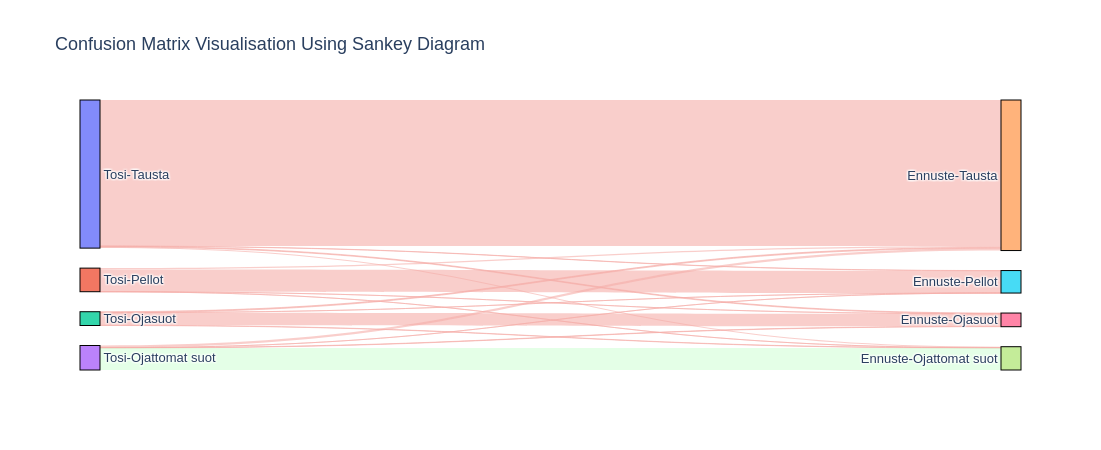

In [11]:
# create a Sankey chart
fig = go.Figure(data=[go.Sankey(
    
    node = dict(
      pad = 20,
      thickness = 20,
      line = dict(color = "black", width = 1.0),
      label = labels,
      
      # this template will be used to display text when hovering over nodes  
      hovertemplate = "%{label} has total %{value:d} instances<extra></extra>"
    ),
    link = dict(
      source = df.source, 
      target = df.target,
      value = df.value,
      color = df.colour,
      customdata = df['tooltip'], 
        
      # this template will be used to display text when hovering over the links  
      hovertemplate = "%{customdata}<extra></extra>"  
  ))])

fig.update_layout(title_text="Confusion Matrix Visualisation Using Sankey Diagram", font_size=13,
                  width=510, height=450)
fig.show(render="jpg")

In [3]:
def tranform_confusion_matrix(confusion_matrix, targets_list=None):
    """
    function to transform confusion matrix to dataframe needed to plot Sankey chart
    
    returns a dataframe and list of unique labels for Sankey chart nodes
    
    Parameters
    --------------
    confusion_matrix : numpy.ndarray
        The confusion matrix to be visualised
    target_list : {'list', 'numpy.ndarray'}
        List of unique classes
        
    """
    
    # create a dataframe
    
    if targets_list is None:
        df = pd.DataFrame(data=confusion_matrix, 
                          index=[f"True Class-{i+1}" for i in range(confusion_matrix.shape[0])],
                          columns=[f"Predicted Class-{i+1}" for i in range(confusion_matrix.shape[0])])
    else:
        df = pd.DataFrame(data=confusion_matrix, 
                          index=[f"Aidot {i}" for i in targets_list],
                          columns=[f"Ennustetut {i}" for i in targets_list])

    # restructre the dataframe
    df = df.stack().reset_index()

    # rename the default column names
    df.rename(columns={'level_0':'source', 'level_1':'target', 0:'value'}, inplace=True)

    # add new column for colour
    # here rgba(211,255,216,0.6) indicates green colour whereas rgba(245,173,168,0.6) is red colour
    # green colour illustrates correct predictions and red colour is for incorrect predictions
    df["colour"] = df.apply(lambda x: 
                              "rgba(211,255,216,0.6)" if x.source.split()[1:] == x.target.split()[1:] 
                               else "rgba(245,173,168,0.6)", axis=1)

    df["correct"] = df.apply(lambda x: 
                              1 if x.source.split()[1:] == x.target.split()[1:] 
                               else 0, axis=1)
    # extract unique values from source and target columns
    labels = pd.concat([df.source, df.target]).unique()

    # get indices of the above unique values
    labels_indices = {label:index for index, label in enumerate(labels)}
    labels_indices

    # map the source and target column using the above indices
    df[["source", "target"]] = df[["source", "target"]].map(lambda x: labels_indices[x])

    # create a column for tooltip
    df["tooltip"] = df.apply(lambda x:
                             f"{x['value']} {' '.join(labels[x['source']].split()[1:])} instances correctly classified as {' '.join(labels[x['target']].split()[1:])}" 
                             if x['colour']=='rgba(211,255,216,0.6)'

                             else 
                             f"{x['value']} {' '.join(labels[x['source']].split()[1:])} instances misclassified as {' '.join(labels[x['target']].split()[1:])}", axis=1)

    return df, labels
    

def plot_sankey_for_confusion_matrix(df, labels):
    
    """
    plots sankey diagram from given dataframe and labels
    """
    
    # plot figure
    fig = go.Figure(data=[go.Sankey(
    
    node = dict(
      pad = 20,
      thickness = 1,
      line = dict(color = "black", width = 1.0),
      label = labels,
      
      # this template will be used to display text when hovering over nodes  
      hovertemplate = "%{label} has total %{value:d} instances<extra></extra>"
    ),
    link = dict(
      source = df.source, 
      target = df.target,
      value = df.value,
      color = df.colour,
      customdata = df['tooltip'], 
        
      # this template will be used to display text when hovering over the links  
      hovertemplate = "%{customdata}<extra></extra>"  
    ))])
    fig.update_layout(font_size=50, font_color='black',
                      width=3000, height=2000)
    return fig

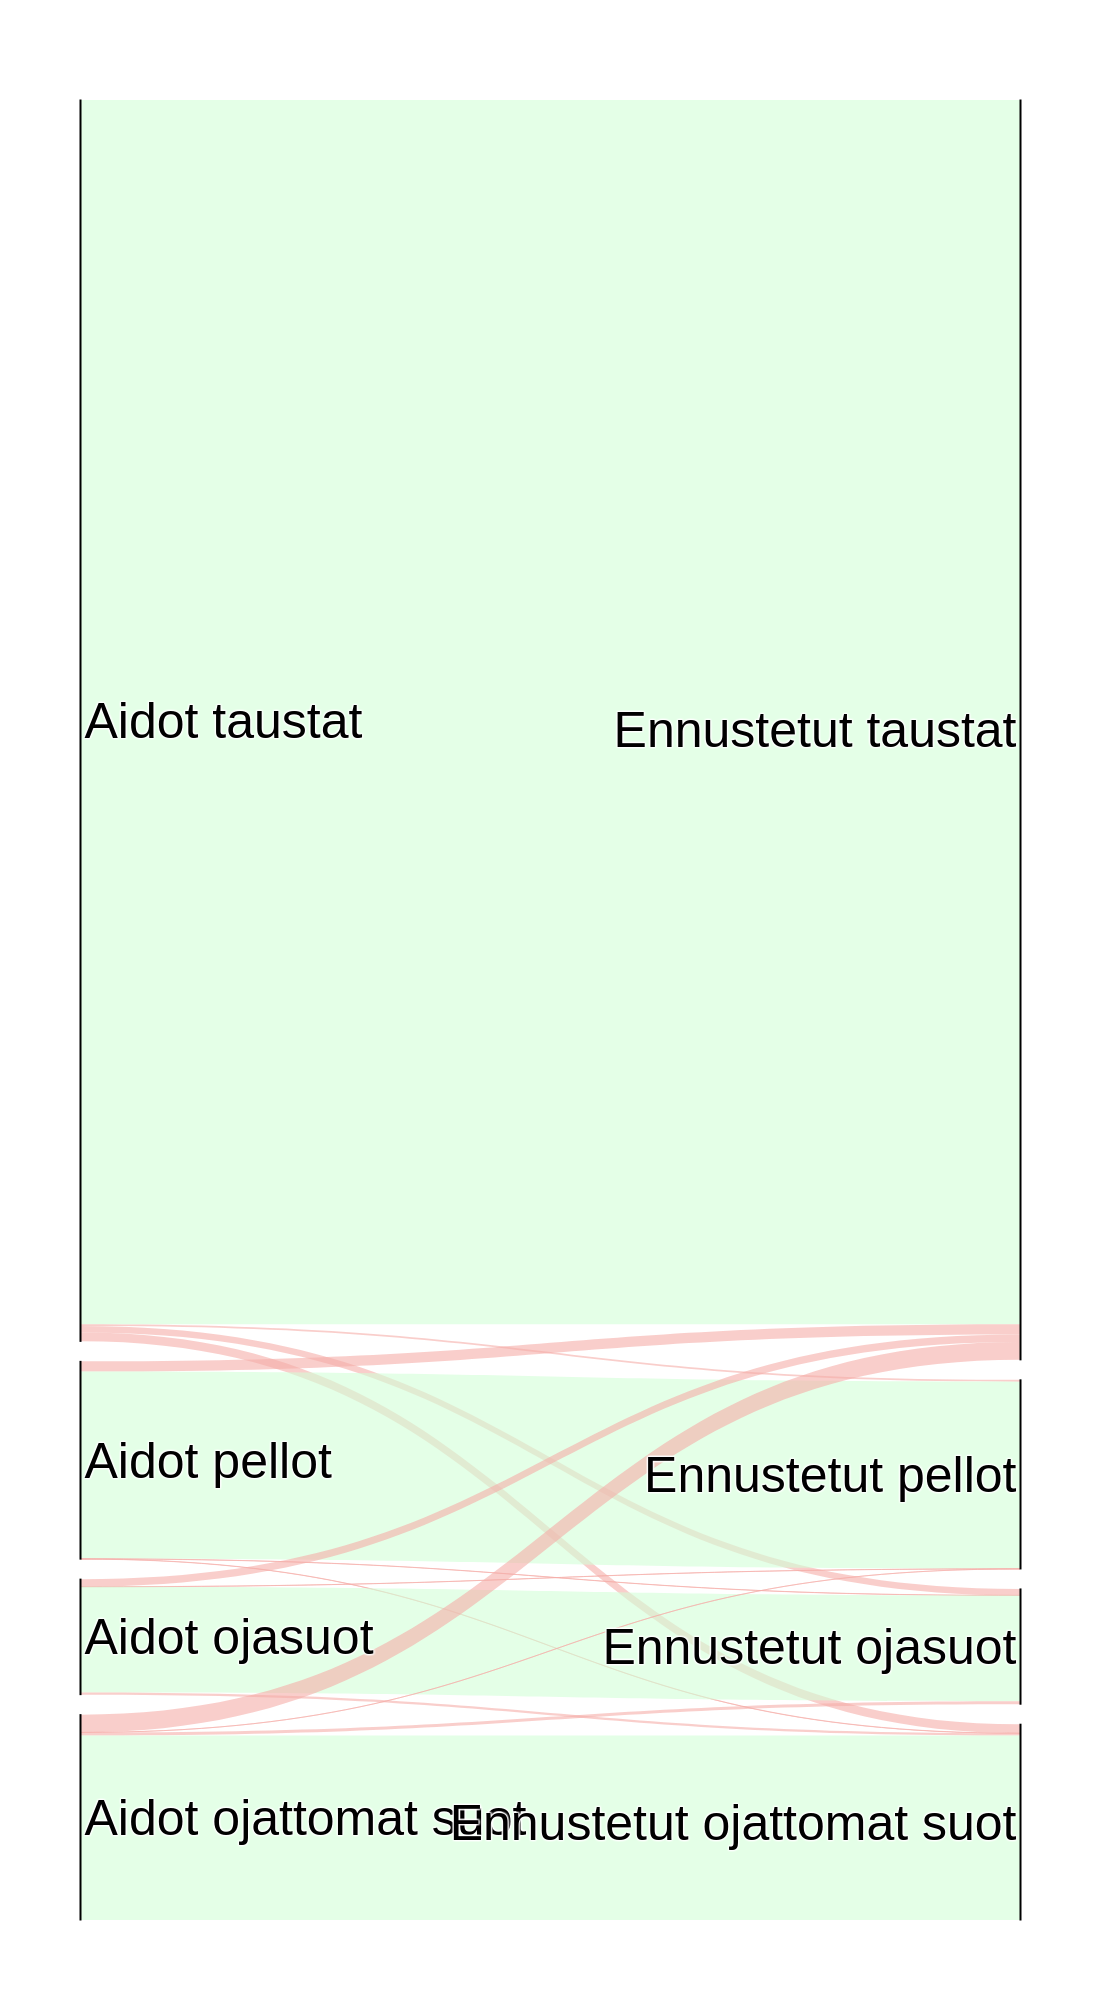

In [4]:
df,plot_labels = tranform_confusion_matrix(confusion_matrix,  ['taustat', 'pellot', 'ojasuot', 'ojattomat suot']) 

plot_sankey_for_confusion_matrix(df, plot_labels)

In [5]:
sorted = df.sort_values('correct', axis=0, ascending=False)

for class_n in range(4):
    sorted.loc[sorted['source']==class_n, 'colour'] = colour_dict[class_n]

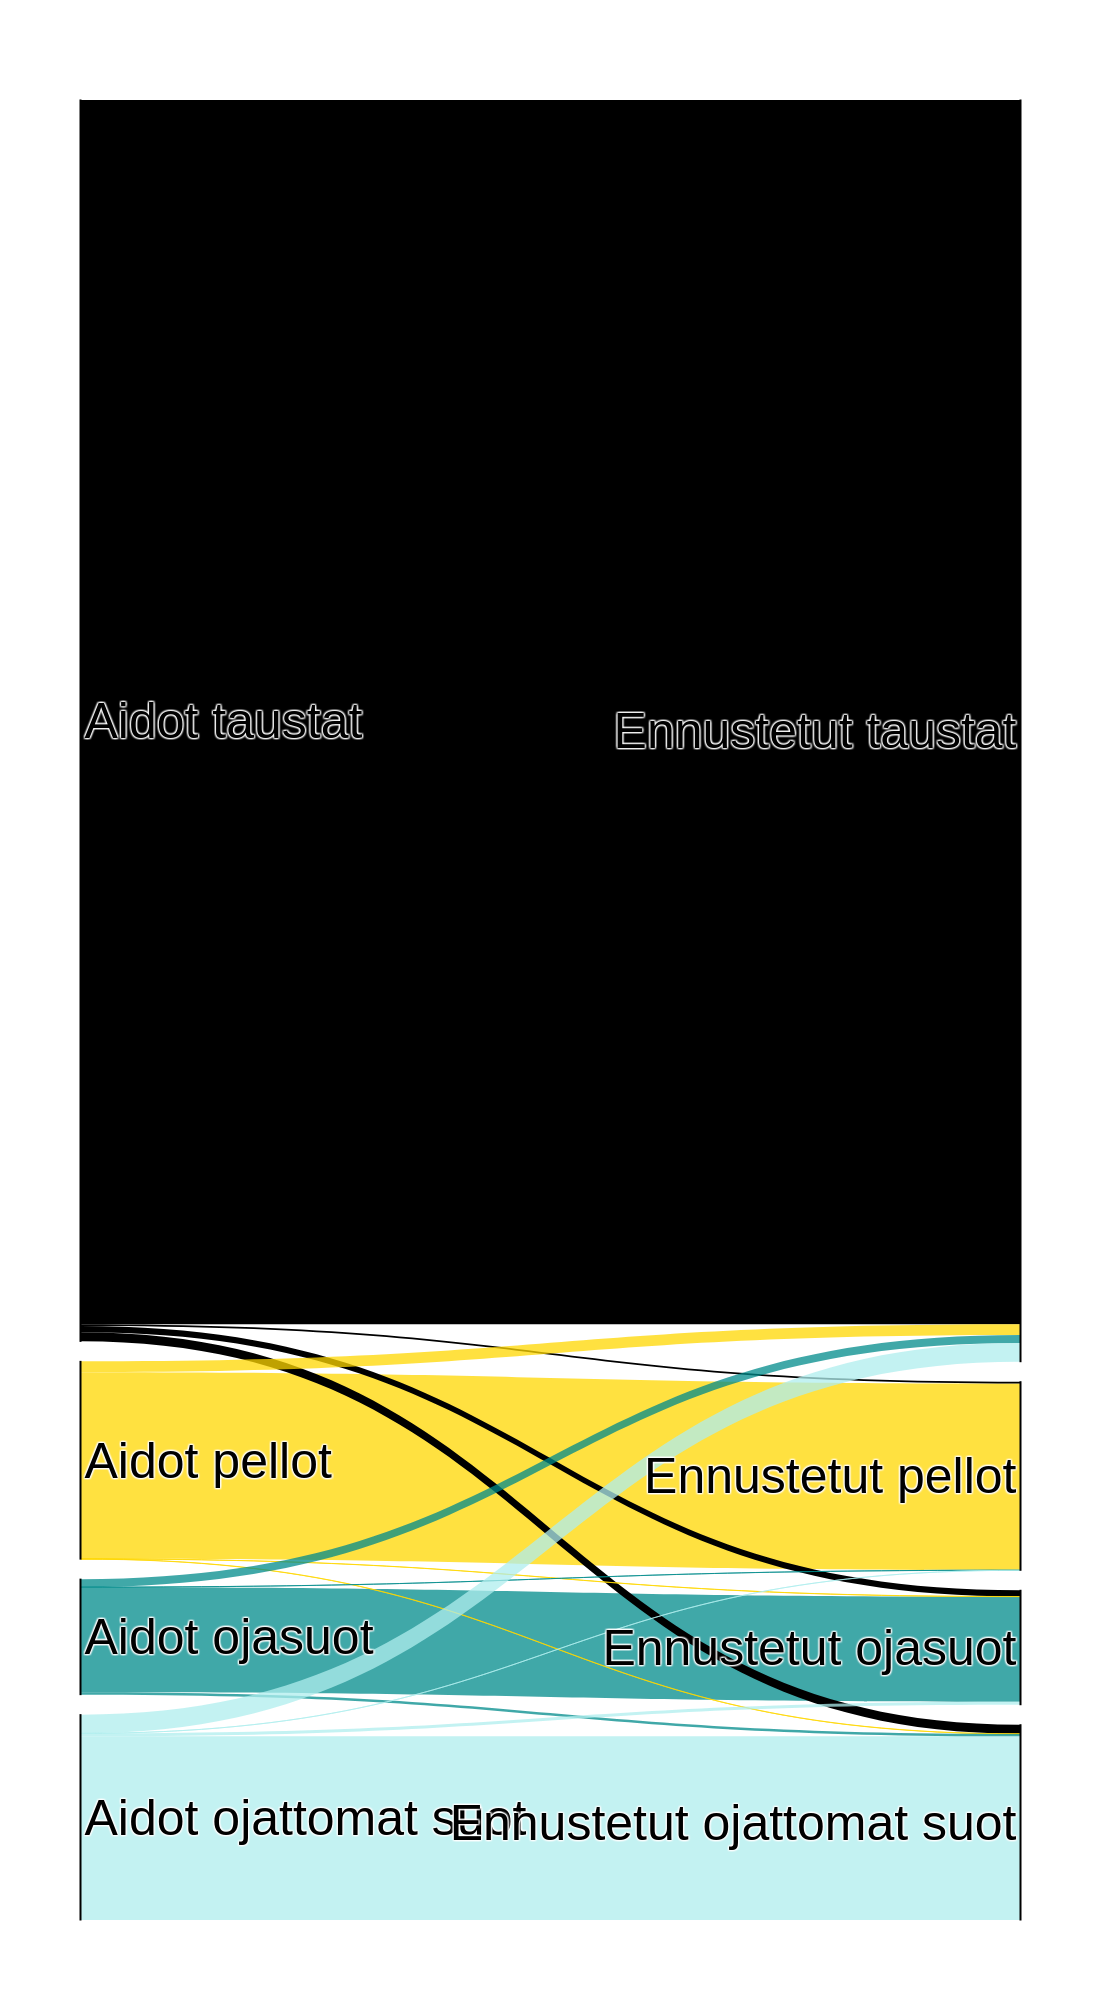

In [17]:
plot_sankey_for_confusion_matrix(sorted, plot_labels)

In [84]:
sorted

source  target     value                    colour  correct  \
0        0       4  20619360           rgba(0,0,0,0.9)        1   
5        1       5   3154127    rgba(255, 215, 0, 0.9)        1   
10       2       6   1757300    rgba(0, 139, 139, 0.9)        1   
15       3       7   3117330  rgba(175, 238, 238, 0.9)        1   
1        0       5     28592           rgba(0,0,0,0.9)        0   
2        0       6     83152           rgba(0,0,0,0.9)        0   
3        0       7    126676           rgba(0,0,0,0.9)        0   
4        1       4    188916    rgba(255, 215, 0, 0.9)        0   
6        1       6      2531    rgba(255, 215, 0, 0.9)        0   
7        1       7      3332    rgba(255, 215, 0, 0.9)        0   
8        2       4    175838    rgba(0, 139, 139, 0.9)        0   
9        2       5      1191    rgba(0, 139, 139, 0.9)        0   
11       2       7     33502    rgba(0, 139, 139, 0.9)        0   
12       3       4    423611  rgba(175, 238, 238, 0.9)        0   
13       3       5       756  rgba(175, 238, 238, 0.9)        0   
14       3       6     60682  rgba(175, 238, 238, 0.9)        0   

                                                                    tooltip  
0                20619360 taustat instances correctly classified as taustat  
5                   3154127 pellot instances correctly classified as pellot  
10                1757300 ojasuot instances correctly classified as ojasuot  
15  3117330 ojattomat suot instances correctly classified as ojattomat suot  
1                           28592 taustat instances misclassified as pellot  
2                          83152 taustat instances misclassified as ojasuot  
3                  126676 taustat instances misclassified as ojattomat suot  
4                          188916 pellot instances misclassified as taustat  
6                            2531 pellot instances misclassified as ojasuot  
7                     3332 pellot instances misclassified as ojattomat suot  
8                         175838 ojasuot instances misclassified as taustat  
9                            1191 ojasuot instances misclassified as pellot  
11                  33502 ojasuot instances misclassified as ojattomat suot  
12                 423611 ojattomat suot instances misclassified as taustat  
13                     756 ojattomat suot instances misclassified as pellot  
14                  60682 ojattomat suot instances misclassified as ojasuot

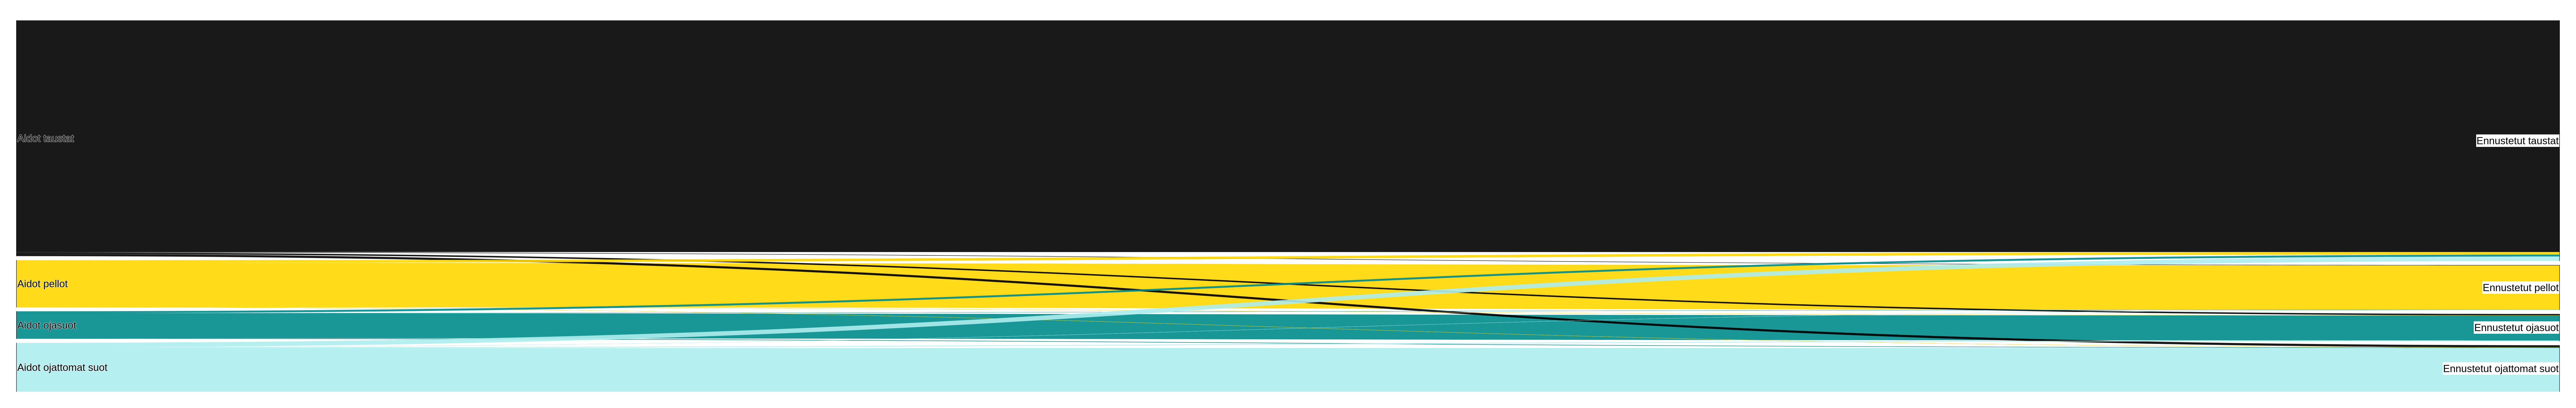

In [26]:
non_background_df,plot_labels = tranform_confusion_matrix(non_background_confusion_matrix,  ['taustat', 'pellot', 'ojasuot', 'ojattomat suot'])
non_background_sorted = non_background_df.sort_values('correct', axis=0, ascending=False)

for class_n in range(4):
    non_background_sorted.loc[non_background_sorted['source']==class_n, 'colour'] = colour_dict[class_n]

plot_sankey_for_confusion_matrix(non_background_sorted, plot_labels)

In [20]:
non_background_sorted

source  target     value                    colour  correct  \
0        0       4  16482720        rgba(0, 0, 0, 1.0)        1   
5        1       5   3157742    rgba(255, 215, 0, 0.9)        1   
10       2       6   1778522    rgba(0, 139, 139, 0.9)        1   
15       3       7   3107045  rgba(175, 238, 238, 0.9)        1   
1        0       5     30443        rgba(0, 0, 0, 1.0)        0   
2        0       6    105351        rgba(0, 0, 0, 1.0)        0   
3        0       7    153720        rgba(0, 0, 0, 1.0)        0   
4        1       4    182411    rgba(255, 215, 0, 0.9)        0   
6        1       6      2334    rgba(255, 215, 0, 0.9)        0   
7        1       7      3367    rgba(255, 215, 0, 0.9)        0   
8        2       4    134734    rgba(0, 139, 139, 0.9)        0   
9        2       5      1402    rgba(0, 139, 139, 0.9)        0   
11       2       7     39636    rgba(0, 139, 139, 0.9)        0   
12       3       4    316550  rgba(175, 238, 238, 0.9)        0   
13       3       5       656  rgba(175, 238, 238, 0.9)        0   
14       3       6     50119  rgba(175, 238, 238, 0.9)        0   

                                                                    tooltip  
0                16482720 taustat instances correctly classified as taustat  
5                   3157742 pellot instances correctly classified as pellot  
10                1778522 ojasuot instances correctly classified as ojasuot  
15  3107045 ojattomat suot instances correctly classified as ojattomat suot  
1                           30443 taustat instances misclassified as pellot  
2                         105351 taustat instances misclassified as ojasuot  
3                  153720 taustat instances misclassified as ojattomat suot  
4                          182411 pellot instances misclassified as taustat  
6                            2334 pellot instances misclassified as ojasuot  
7                     3367 pellot instances misclassified as ojattomat suot  
8                         134734 ojasuot instances misclassified as taustat  
9                            1402 ojasuot instances misclassified as pellot  
11                  39636 ojasuot instances misclassified as ojattomat suot  
12                 316550 ojattomat suot instances misclassified as taustat  
13                     656 ojattomat suot instances misclassified as pellot  
14                  50119 ojattomat suot instances misclassified as ojasuot